In [4]:
# Q-1
#Step 1: Importing pandas
import pandas as pd
from scipy.stats import ttest_ind

#Step 2: Loading data into DataFrame
df = pd.read_csv("members_Tanjeem.csv")

#Step 3: Converting date columns
df['visitDate'] = pd.to_datetime(df['visitDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

#Step 4: Filtering "inactive" status members
inactive = df[df['status'] == 'inactive'].copy()

#Step 5: Displaying how long someone stayed (in months)
inactive['months'] = (inactive['endDate'].dt.year - inactive['visitDate'].dt.year) * 12 + \
                     (inactive['endDate'].dt.month - inactive['visitDate'].dt.month)

#Step 6: Separating men and women
men = inactive[inactive['gender'] == 'M']['months']
women = inactive[inactive['gender'] == 'F']['months']

#Step 7: Running a t-test to see if there is a difference
t_stat, p_val = ttest_ind(men, women)
print("T-statistic:", t_stat)
print("P-value:", p_val)

#Step 8: Interpret
if p_val < 0.05:
    print("There is a significant difference between men and women.")
else:
    print("There is NO significant difference between men and women.")


T-statistic: -3.637102279462759
P-value: 0.0002953669077629579
There is a significant difference between men and women.


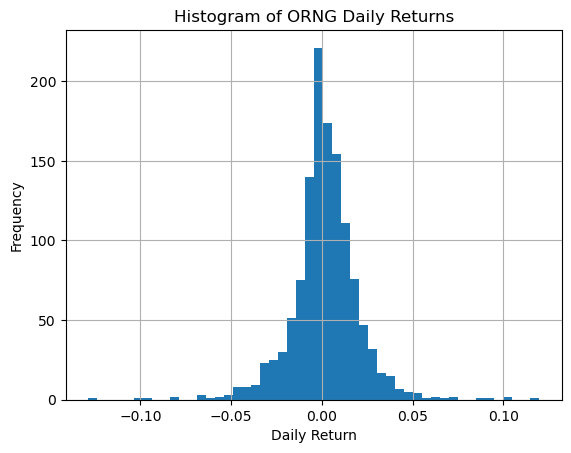

Skewness: -0.10086668016451043
Kurtosis: 6.619254082806862
Normality Test p-value: 5.866465781918973e-40
Returns are NOT normally distributed.
Extreme return days (more than ±3 std):
          Date  daily_return
20  2017-02-01      0.060975
463 2018-11-02     -0.066324
498 2018-12-26      0.070414
503 2019-01-03     -0.099602
521 2019-01-30      0.068335
592 2019-05-13     -0.058122
792 2020-02-27     -0.065373
794 2020-03-02      0.093104
799 2020-03-09     -0.079092
800 2020-03-10      0.072021
802 2020-03-12     -0.098750
803 2020-03-13      0.119804
804 2020-03-16     -0.128650
808 2020-03-20     -0.063488
810 2020-03-24      0.100331
819 2020-04-06      0.087235
900 2020-07-31      0.104690
924 2020-09-03     -0.080059
926 2020-09-08     -0.067296
950 2020-10-12      0.063522
964 2020-10-30     -0.056021


In [5]:
# Q-2
#Step 1: Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest

#Step 2: Loading data into DataFrame
df = pd.read_csv("ORNG1_Tanjeem.csv")

#Step 3: Convert and sort date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

#Step 4: Calculating daily return
df['daily_return'] = df['AdjustedClose'].pct_change()

#Step 5: Plotting a histogram of daily returns
df['daily_return'].hist(bins=50)
plt.title("Histogram of ORNG Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

#Step 6: Calculating Skewness and Kurtosis
print("Skewness:", skew(df['daily_return'].dropna()))
print("Kurtosis:", kurtosis(df['daily_return'].dropna()))

#Step 7: Normality Test
stat, p = normaltest(df['daily_return'].dropna())
print("Normality Test p-value:", p)

if p < 0.05:
    print("Returns are NOT normally distributed.")
else:
    print("Returns look normal.")


#Step 8: Calculating mean and std
mean = df['daily_return'].mean()
std = df['daily_return'].std()

#Step 9: Filtering extreme values
outliers = df[(df['daily_return'] > mean + 3*std) |
              (df['daily_return'] < mean - 3*std)]

#Step 10: Showing results
print("Extreme return days (more than ±3 std):")
print(outliers[['Date', 'daily_return']])
